# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# We want to do a left join. Since we will be mergin on Mouse ID, we dont' want that mice's ID at every single checkpoint.

merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df.head()

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice.
# You could to a .unique
mouse_ids = merge_df['Mouse ID'].unique()
len(mouse_ids)


249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# This is saying there is some bad data, identify a mouse that has duplicated at timepoints.
# Delete this mouse later on in this activity from the data.
# There is just one mouse with this problem.

#duplicates = [merge_df.duplicated(subset = ['Mouse ID','Timepoint']) == True]
#duplicates
#duplicates = merge_df[merge_df['Mouse ID', 'Timepoint'].duplicated() == True]
#duplicates


duplicates = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])==True]
duplicates


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == 'g989'] 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df[merge_df['Mouse ID'] != 'g989'] 
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_ids = clean_df['Mouse ID'].unique()
len(clean_mouse_ids)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_volumes1 = clean_df.groupby(["Drug Regimen"]).mean()
tumor_volume_mean = tumor_volumes1["Tumor Volume (mm3)"]

tumor_volumes2 = clean_df.groupby(["Drug Regimen"]).median()
tumor_volume_median = tumor_volumes2["Tumor Volume (mm3)"]

tumor_volumes3 = clean_df.groupby(["Drug Regimen"]).var()
tumor_volume_variance = tumor_volumes3["Tumor Volume (mm3)"]

tumor_volumes4 = clean_df.groupby(["Drug Regimen"]).std()
tumor_volume_stdeviation = tumor_volumes4["Tumor Volume (mm3)"]

tumor_volumes5 = clean_df.groupby(["Drug Regimen"]).sem()
tumor_volume_sterror = tumor_volumes5["Tumor Volume (mm3)"]


# tumor_volume_mean = clean_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"]).mean()
# tumor_volume_median = clean_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"]).median()
# tumor_volume_variance = clean_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"]).var()
# tumor_volume_stdeviation = clean_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"]).std()
# tumor_volume_sterror = clean_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"]).sem()

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_stdeviation,  
    "Tumor Volume Std. Err.": tumor_volume_sterror}
)
summary_statistics


# Assemble the resulting series into a single summary DataFrame.


/var/folders/bg/68hkgjmn1yzg34cz26595nxh0000gn/T/ipykernel_4185/2012265140.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volumes1 = clean_df.groupby(["Drug Regimen"]).mean()
/var/folders/bg/68hkgjmn1yzg34cz26595nxh0000gn/T/ipykernel_4185/2012265140.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volumes2 = clean_df.groupby(["Drug Regimen"]).median()
/var/folders/bg/68hkgjmn1yzg34cz26595nxh0000gn/T/ipykernel_4185/2012265140.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either sp

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

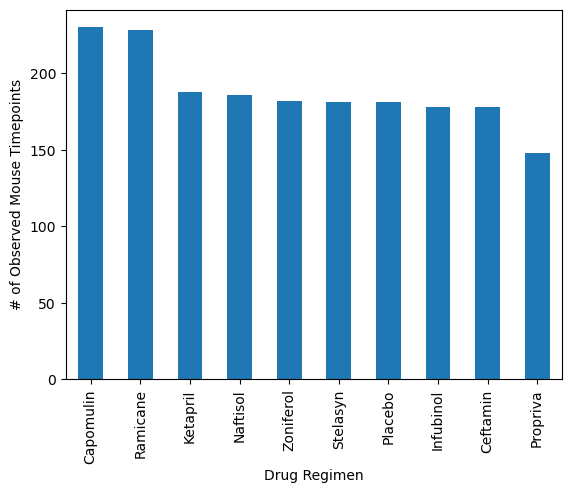

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barplot = clean_df['Drug Regimen'].value_counts()
pandas_plot = barplot.plot.bar(x = 'Drug Regimen', y = '# of Observed Mouse Timepoints', rot = 90)
pandas_plot.set_xlabel("Drug Regimen")
pandas_plot.set_ylabel("# of Observed Mouse Timepoints")
pandas_plot

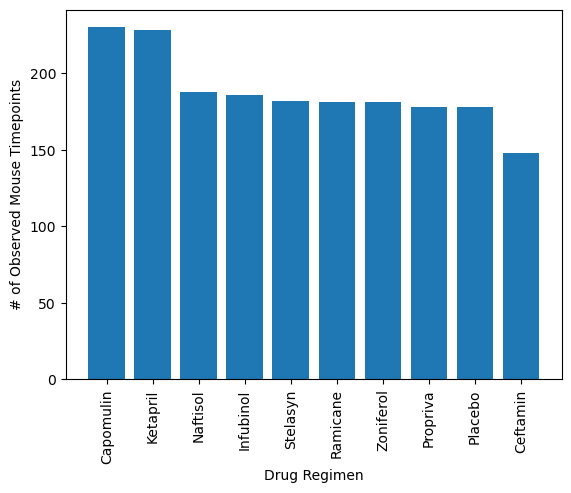

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = clean_df['Drug Regimen'].unique()
y_axis = clean_df['Drug Regimen'].value_counts()

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation = 90) 
plt.show()


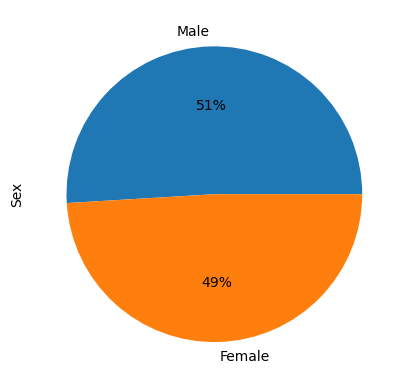

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_df['Sex'].value_counts()

mouse_sex.plot(kind="pie",  autopct='%1.0f%%')
plt.show()


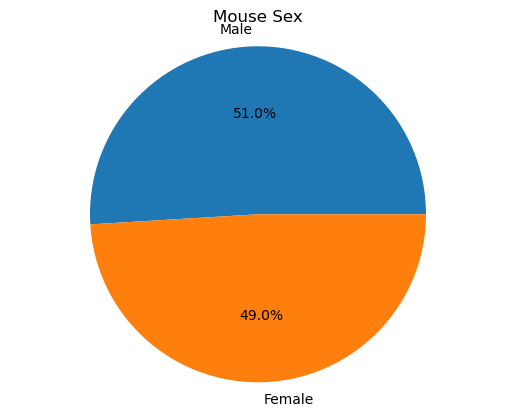

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_data = clean_df['Sex'].value_counts()
my_labels = 'Male', 'Female'
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Mouse Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
timepoints = clean_df.groupby(["Mouse ID"]).max()
max_timepoints = timepoints["Timepoint"]
time_df = max_timepoints.reset_index()

merged_df = pd.merge(time_df, merge_df,  how='left', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])

# merged_df = pd.merge(time_df, mouse_metadata, on="Mouse ID","Timepoint", how="left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [44]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    volume = merged_df.loc[(merged_df['Drug Regimen'] == treatment), "Tumor Volume (mm3)"]
    # add subset 
    
    tumor_vol_data.append(volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {treatment} could be outliers.")
    print(f"Values above {upper_bound} for {treatment} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 2

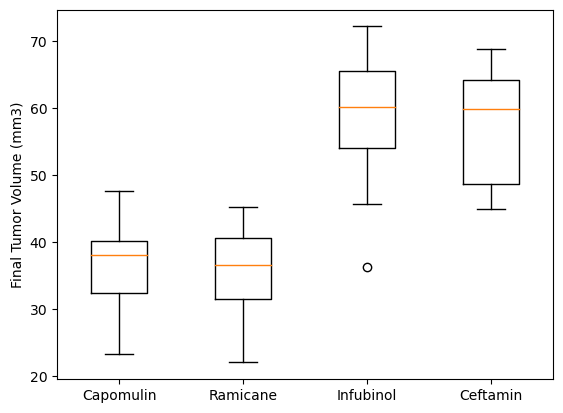

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

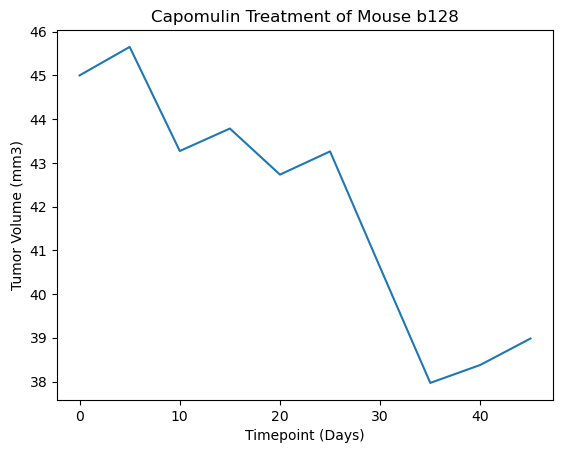

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin")]
capomulin_data_single_mouse = capomulin_data.loc[(clean_df['Mouse ID'] == "b128")]

x_axis = capomulin_data_single_mouse['Timepoint']
y_axis = capomulin_data_single_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (Days)")  # add X-axis label
plt.ylabel("Tumor Volume (mm3)")  # add Y-axis label
plt.title("Capomulin Treatment of Mouse b128") 
plt.show()

#print(capomulin_data)


/var/folders/bg/68hkgjmn1yzg34cz26595nxh0000gn/T/ipykernel_4185/3040958638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tumor_volumes_in_table = capomulin_data.groupby(["Tumor Volume (mm3)"]).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

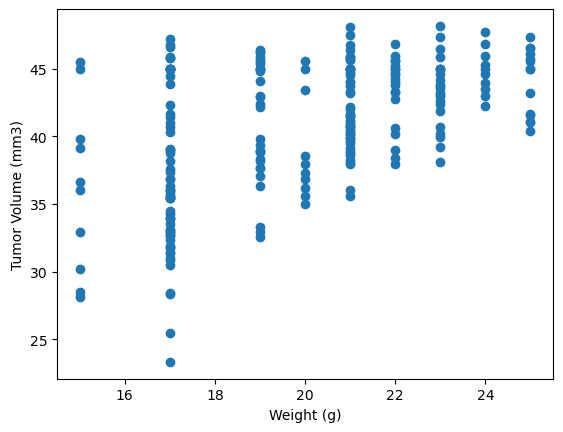

In [91]:
avg_tumor_volumes_in_table = capomulin_data.groupby(["Tumor Volume (mm3)"]).mean()
avg_tumor_volumes_in_table1 = avg_tumor_volumes_in_table.reset_index()

avg_tumor_volume = avg_tumor_volumes_in_table1["Tumor Volume (mm3)"]
#avg_observed_tumor_volumes = avg_tumor_volumes["Tumor Volume (mm3)"]

x_value = np.array(capomulin_data['Weight (g)'])
y_value = np.array(capomulin_data["Tumor Volume (mm3)"])

plt.scatter(x_value, y_value)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")  
#plt.scatter(capomulin_data['Weight (g)'], avg_tumor_volumes)
plt.show


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.9609669432428373.


<function matplotlib.pyplot.show(close=None, block=None)>

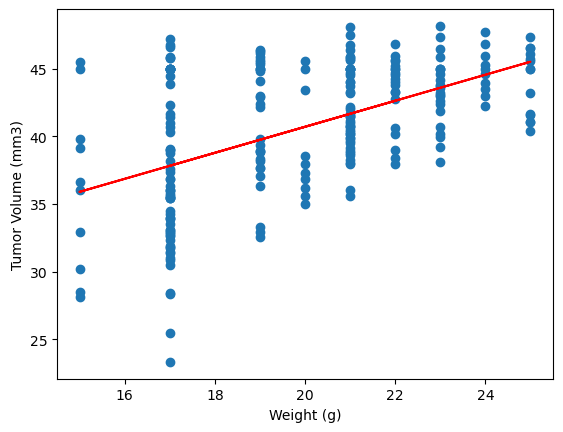

In [98]:
from scipy.stats import linregress

x_value = np.array(capomulin_data['Weight (g)'])
y_value = np.array(capomulin_data["Tumor Volume (mm3)"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")  

print(f"The correlation between mouse weight and the tumor volume is {slope}.")

plt.show
